In [34]:
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [36]:
labels=pd.read_csv('/content/drive/MyDrive/animal classification/dataframe.csv')
labels

,file name,label
0,/content/drive/MyDrive/animal classification/i...,cat
1,/content/drive/MyDrive/animal classification/i...,cat
2,/content/drive/MyDrive/animal classification/i...,cat
3,/content/drive/MyDrive/animal classification/i...,cat
4,/content/drive/MyDrive/animal classification/i...,cat
...,...,...
215,/content/drive/MyDrive/animal classification/i...,dog
216,/content/drive/MyDrive/animal classification/i...,dog
217,/content/drive/MyDrive/animal classification/i...,dog
218,/content/drive/MyDrive/animal classification/i...,dog


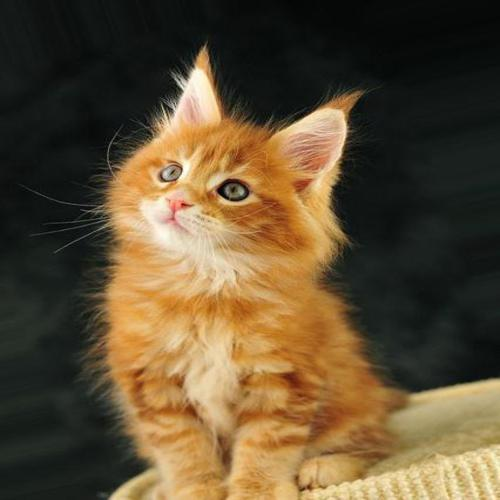

In [37]:
img=cv2.imread(labels['file name'][0])
cv2_imshow(img)

In [38]:
img.shape

(500, 500, 3)

In [39]:
img_size=img.shape

In [40]:
x=[]
y=[]

for img,target in zip(labels['file name'],labels.label):
  x.append(cv2.imread(img))
  y.append(target)

In [41]:
encoder=LabelEncoder()
y_encoded=encoder.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=12,shuffle=True)

In [43]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

# convert to 4-d
x_train = x_train.reshape(-1, img_size[0], img_size[1], img_size[2])  #-1 place holder it automatically take the counts of x_train and reshape it
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size[0], img_size[1], img_size[2])
y_test = np.array(y_test)

In [44]:
x_train.shape, x_test.shape

((176, 500, 500, 3), (44, 500, 500, 3))

In [45]:
model = Sequential()
model.add(Conv2D(32,5,padding='same',activation='relu', input_shape=(img_size[0], img_size[1], img_size[2])))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))

In [46]:
model.compile(optimizer=Adam(learning_rate=0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [47]:
history = model.fit(x_train,y_train,epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
6/6 [==============================] - 3s 453ms/step - loss: 126.8636 - accuracy: 0.1875 - val_loss: 16.5642 - val_accuracy: 0.1364
Epoch 2/5
6/6 [==============================] - 2s 388ms/step - loss: 5.4006 - accuracy: 0.2557 - val_loss: 3.6506 - val_accuracy: 0.1364
Epoch 3/5
6/6 [==============================] - 2s 329ms/step - loss: 2.1365 - accuracy: 0.2500 - val_loss: 1.5147 - val_accuracy: 0.2500
Epoch 4/5
6/6 [==============================] - 2s 327ms/step - loss: 1.5043 - accuracy: 0.3239 - val_loss: 1.5628 - val_accuracy: 0.2273
Epoch 5/5
6/6 [==============================] - 2s 328ms/step - loss: 1.6127 - accuracy: 0.2727 - val_loss: 1.6445 - val_accuracy: 0.1818


In [48]:
pred = np.argmax(model.predict(x_test[11].reshape(-1,500,500,3)))
pred_name = encoder.inverse_transform([pred])
pred_name

1/1 [==============================] - 0s 70ms/step


array(['lion'], dtype='<U8')

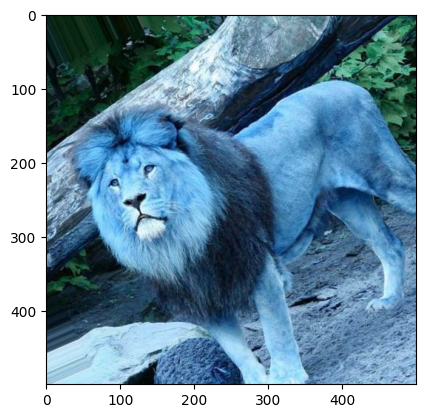

In [49]:

plt.imshow(x_test[11])